In [1]:
import numpy as np
import pandas as pd
import time
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

import cir
from cir import CIR
from importlib import reload
reload(cir)


data = pd.read_csv('pbmc_1_counts.csv')
data = data.iloc[:, 1:]
data = data.transpose()

cell_type = pd.read_csv('pbmc_1_cell_type.csv')
cell_type = cell_type.iloc[:, 1].values

# foreground data
fg = data.dropna()

p = 100     # p can vary from 100 to 500
# select the top p highly variable genes
col_var = np.var(fg, axis=0)
col_var_sorted_idx = np.argsort(-col_var)
fg = fg.iloc[:, col_var_sorted_idx[:p]]

# foreground label: cell types
Y = cell_type
Y = pd.Categorical(Y)
Y = Y.rename_categories({'B cell': '0', 'CD4 T cell': '1', 'CD8 T cell': '2', 'NK cell': '3',
                         'Plasma cell': '4', 'cDC': '5', 'cMono': '6', 'ncMono': '7', 'pDC': '8'})
Y = Y.astype(float)
labels = np.unique(Y)      # set of unique foreground labels
L = len(labels)         # number of foreground classes/slices
n = fg.shape[0]  # foreground sample size
X = fg - np.mean(fg, axis=0)
X = X.values

# background data
bg = fg
m, p = bg.shape  # background sample size
Yt = 3 * np.ones((m, 1))  # background labels
Yt = np.random.randint(1, 10, size=(m, 1))


# tuning parameter
alpha = 1.5
d = 2

# CIR
print("CIR......")
V_CIR = CIR(fg, Y, bg, Yt, alpha, d)
X_CIR = X @ V_CIR

colors = [[228/255, 26/255, 28/255],
          [55/255, 126/255, 184/255],
          [77/255, 175/255, 74/255],
          [152/255, 78/255, 163/255],
          [255/255, 127/255, 0/255],
          [255/255, 255/255, 51/255],
          [166/255, 86/255, 40/255],
          [247/255, 129/255, 191/255],
          [153/255, 153/255, 153/255]]


markers = ['o', 's', 'p', 'o', 's', 'p', 'o', 's', 'p']

for l in range(L):
    idx = np.where(Y == labels[l])[0]
    X_curr = X_CIR[idx, :]
    plt.scatter(X_curr[:, 0], X_curr[:, 1], s=100,
                c=colors[l], marker=markers[l])
# plt.hold(False)
plt.title('CIR', fontsize=32)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'pbmc_1_counts.csv'

CIR......


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


---------------------------------------------------

Results for Scaled Gradient Projection Method 

---------------------------------------------------

   Obj. function = 2.411739e+00

   Gradient norm = 1.540704e-04 

   ||X^T*X-I||_F = 9.17e-16

   Iteration number = 3000

   Cpu time (secs) = 8.8355

   Number of evaluation(Obj. func) = 3316



/var/folders/dr/k6wp_5ns5hj632l6j_ks1nc80000gn/T/ipykernel_12726/438958727.py:75: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_curr[:, 0], X_curr[:, 1], s=100,


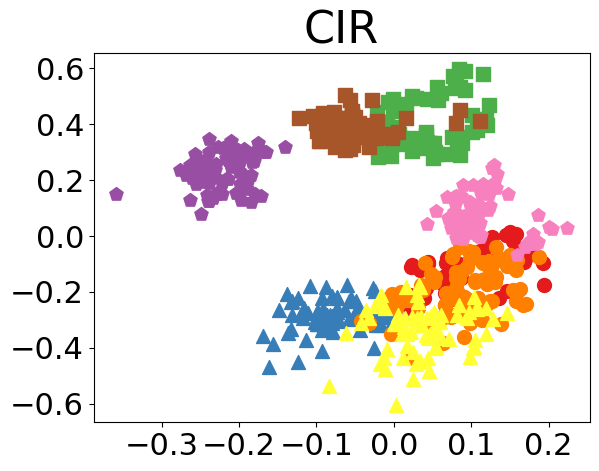

In [4]:
import numpy as np
import pandas as pd
import time
import matplotlib
from matplotlib import pyplot as plt
from cir import CIR


data = pd.read_csv(
    'Data_Cortex_Nuclear.csv')

# foreground data
fg = data.dropna()

# foreground label
Y = fg['class']
Y = pd.Categorical(Y)
Y = Y.rename_categories({'c-CS-m': '0', 'c-CS-s': '1', 'c-SC-m': '2', 'c-SC-s': '3',
                         't-CS-m': '4', 't-CS-s': '5', 't-SC-m': '6', 't-SC-s': '7'})
Y = Y.astype(float)
labels = np.unique(Y)      # set of unique foreground labels
L = len(labels)         # number of foreground classes/slices
fg = fg.iloc[:, 1:78]
n = fg.shape[0]  # foreground sample size
X = fg - np.mean(fg, axis=0)
X = X.values

# background data
bg = data[data['Genotype'] == 'Control'].copy()
bg = bg.dropna()

# background label
Yt = bg['Behavior']
Yt = pd.Categorical(Yt)
Yt = Yt.rename_categories({'C/S': '0', 'S/C': '1'})

Yt = Yt.astype(float)
labelst = np.unique(Yt)   # set of unique background labels
Lt = len(labelst)       # number of background classes/slices
bg = bg.iloc[:, 1:78]
m, p = bg.shape

# tuning parameter alpha
alpha = 0.0001
# reduce dimension from 77 to 2 for visualization
d = 2

# CIR
print("CIR......")
start_time = time.time()

V_CIR = CIR(fg, Y, bg, Yt, alpha, d)
X_CIR = X @ V_CIR


end_time = time.time()

# colors credit to Color Brewer
colors = [[228/255, 26/255, 28/255],
          [55/255, 126/255, 184/255],
          [77/255, 175/255, 74/255],
          [152/255, 78/255, 163/255],
          [255/255, 127/255, 0/255],
          [255/255, 255/255, 51/255],
          [166/255, 86/255, 40/255],
          [247/255, 129/255, 191/255]]

markers = ['o', '^', 's', 'p', 'o', '^', 's', 'p']

# plt.subplot(3, 3, 6)
# plt.hold(True)
for l in range(L):
    idx = np.where(Y == labels[l])[0]
    X_curr = X_CIR[idx, :]
    plt.scatter(X_curr[:, 0], X_curr[:, 1], s=100,
                c=colors[l], marker=markers[l])
# plt.hold(False)
plt.title('CIR', fontsize=32)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()
